In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import pingouin as pg
from mdi_computation import mdi_compute, smdi_compute
%matplotlib widget

In [3]:
scan_numbers = [16, 24, 32, 48, 64]

compiled_csv_paths = glob.glob("./compiled_spectral_data/*_scan*.csv")
wavenumber = pd.read_csv("./compiled_spectral_data/wavenumber.csv")
scan_16, scan_24, scan_32, scan_48, scan_64 = [
    pd.read_csv(path) for path in compiled_csv_paths
]

scan_number_dataframes = [scan_16, scan_24, scan_32, scan_48, scan_64]

for df in scan_number_dataframes:
    df["average"] = df.mean(axis=1)

In [4]:
colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"]

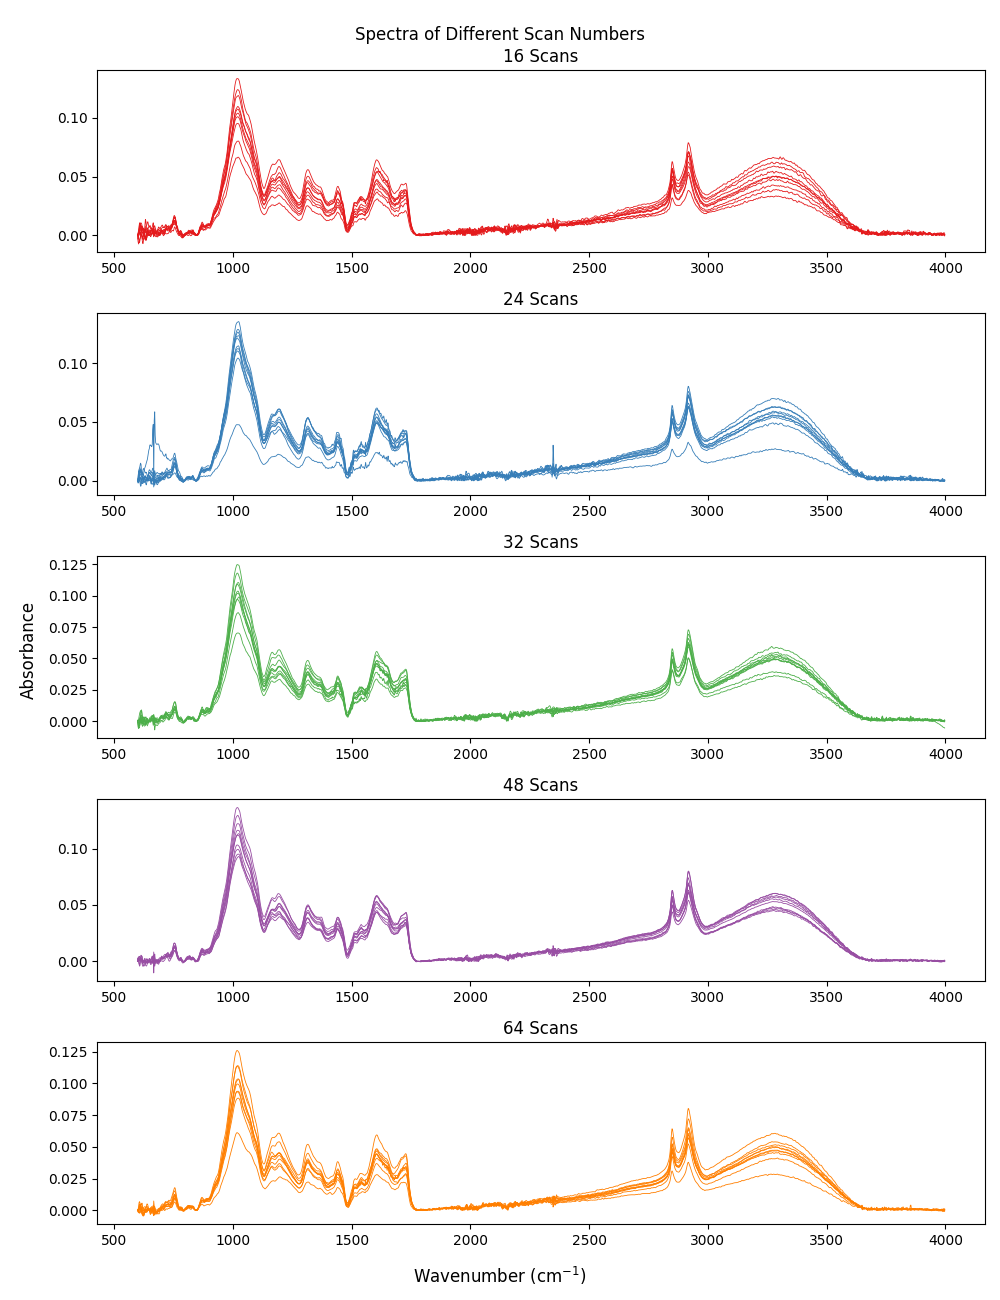

In [5]:
all_scans_fig, asf_axes = plt.subplots(5, 1, figsize=(10, 13))

for axis, number, color, df in zip(
    asf_axes, scan_numbers, colors, scan_number_dataframes
):
    for replicate in df.columns:
        spectrum = df[replicate]
        axis.plot(wavenumber, spectrum, color=color, linewidth=0.6)

    axis.set(title=f"{number} Scans")

all_scans_fig.suptitle("Spectra of Different Scan Numbers")
all_scans_fig.supxlabel("Wavenumber (cm$^{-1}$)")
all_scans_fig.supylabel("Absorbance")

all_scans_fig.tight_layout()

<h1 align="center">MDI Computation & Analysis</h1>

In [10]:
mdi_compute("compiled_spectral_data", "mdi_results")
smdi_compute("mdi_results", "smdi_results")

In [11]:
mdi_results = pd.read_csv("./mdi_results/master_mdi.csv")
smdi_results = pd.read_csv("./smdi_results/master_smdi.csv")

In [19]:
mdi_results

,trichomes_pollen_scan16_mdi,trichomes_pollen_scan24_mdi,trichomes_pollen_scan32_mdi,trichomes_pollen_scan48_mdi,trichomes_pollen_scan64_mdi
0,-0.013343,-0.011838,-0.011402,-0.011878,-0.012710
1,-0.011658,-0.011743,-0.012144,-0.011431,-0.011570
2,-0.012202,-0.012262,-0.012075,-0.011305,-0.011856
3,-0.012266,-0.011543,-0.011829,-0.011674,-0.012426
4,-0.012084,-0.011404,-0.012519,-0.012105,-0.011669
5,-0.012559,-0.011548,-0.012003,-0.011779,-0.011806
6,-0.011733,-0.012076,-0.012231,-0.012520,-0.011729
7,-0.011858,-0.012030,-0.017120,-0.011843,-0.011734
8,-0.011745,-0.011365,-0.011723,-0.012510,-0.011791


In [20]:
smdi_results

,trichomes_pollen_scan16_mdi,trichomes_pollen_scan24_mdi,trichomes_pollen_scan32_mdi,trichomes_pollen_scan48_mdi,trichomes_pollen_scan64_mdi
0,0.649552,0.908387,0.983429,0.901477,0.758506
1,0.939273,0.924734,0.855697,0.978415,0.954550
2,0.845813,0.835515,0.867622,1.000000,0.905326
3,0.834756,0.959047,0.909991,0.936549,0.807326
4,0.866136,0.983045,0.791308,0.862465,0.937546
5,0.784337,0.958277,0.880057,0.918497,0.913933
6,0.926512,0.867390,0.840869,0.791114,0.927227
7,0.904890,0.875393,0.000000,0.907562,0.926348
8,0.924434,0.989798,0.928112,0.792822,0.916440


<h2 align="center">Visualization</h2>

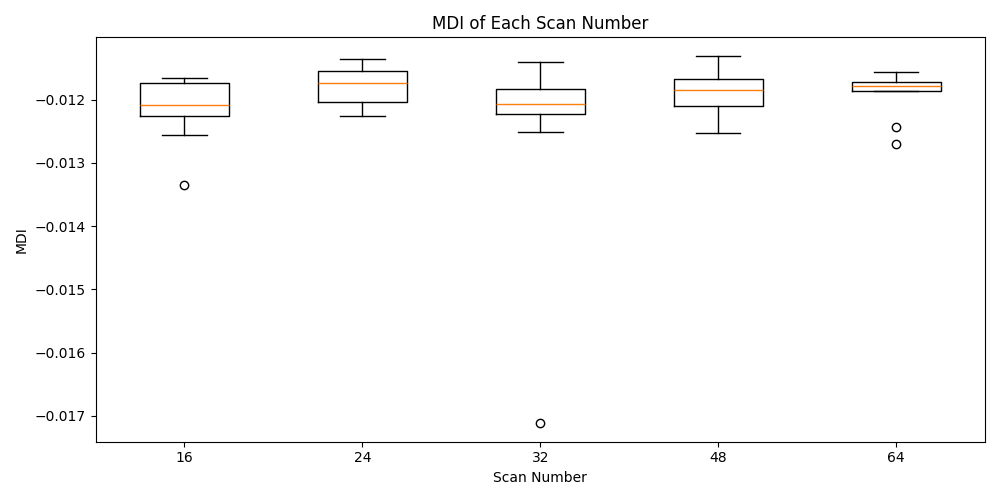

In [14]:
plt.close("all")
mdi_box, box_axis = plt.subplots(1, 1, figsize=(10, 5))

pooled_mdi_data = [mdi_results[column] for column in mdi_results.columns]

box_axis.boxplot(x=pooled_mdi_data)
box_axis.set(
    title="MDI of Each Scan Number",
    xlabel="Scan Number",
    ylabel="MDI",
    xticklabels=scan_numbers,
)

mdi_box.tight_layout()

<h2 align="center">Statistical Analyses</h2>

<h3 align="center">Test for Normality (Shapiro-Wilk Test)</h3>

In [15]:
pg.normality(mdi_results, method="normaltest", alpha=0.05).round(3)

c:\Users\UST\Desktop\Juswa\mango_ftir_optimization\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


,W,pval,normal
trichomes_pollen_scan16_mdi,6.715,0.035,False
trichomes_pollen_scan24_mdi,1.210,0.546,True
trichomes_pollen_scan32_mdi,23.311,0.000,False
trichomes_pollen_scan48_mdi,0.435,0.805,True
trichomes_pollen_scan64_mdi,5.697,0.058,True


<h3 align="center">Test for Homogeneity of Variances (Levene's Test)</h3>

In [16]:
pg.homoscedasticity(mdi_results, method="levene").round(3)

,W,pval,equal_var
levene,0.778,0.546,True


<h3 align="center">Group Comparison (Kruskal-Wallis)</h3>

In [21]:
mdi_results_melted = mdi_results.melt(var_name="scan_number", value_name="mdi")

In [22]:
pg.kruskal(mdi_results_melted, dv="mdi", between="scan_number", detailed=True)

,Source,ddof1,H,p-unc
Kruskal,scan_number,4,4.577134,0.333499
